# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Syafri Winartanto
- **Email:** syafriwo@gmail.com
- **ID Dicoding:** syafri_winartanto

## Menentukan Pertanyaan Bisnis

1. Bagaimana hubungan antara suhu dan jumlah penyewa sepeda ?
2. Apakah terdapat perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?
3. Bagaimana tren penggunaan sepeda dari tahun ke tahun?
4. Bagaimana pola penggunaan sepeda berbeda antara hari-hari dengan kondisi cuaca yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

In [9]:
!pip install -q kaggle

In [10]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [12]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [13]:
!kaggle datasets download -d 'lakshmi25npathi/bike-sharing-dataset'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [14]:
dataset_zip = zipfile.ZipFile('bike-sharing-dataset.zip','r')
dataset_zip.extractall()
dataset_zip.close()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df_day= pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [17]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### tipe data

In [19]:
# Melihat informasi dasar dataset
print("Informasi Day Dataset:")
print('df_day:')
print(df_day.info())

print("\nInformasi Hour Dataset:")
print('\ndf_hour:')
print(df_hour.info())

Informasi Day Dataset:
df_day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi Hour Dataset:

df_hour:
<class 'pandas.core.fr

Berdasarkan informasi pada df_day, terdapat kesalahan dalam jenis data pada kolom dteday yang berupa objek, seharusnya tipe data nya adalah datetime.

### Missing Value

In [20]:
#missing value
print('df_day:')
print(df_day.isna().sum())

print('\ndf_hour:')
print(df_hour.isna().sum())

df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

df_hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dari pengamatan pada dataset day dan hour, tidak ada nilai yang hilang atau kosong.

### Melihat statistik deskriptif dari dataset

In [21]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cek Duplikasi Data

In [23]:
#Duplicate data
print('df_day:', df_day.duplicated().sum())
print("df_hour:", df_hour.duplicated().sum())

df_day: 0
df_hour: 0


Tidak ada data yang duplikat

## Cleaning Data

### Memperbaiki Tipe data

In [24]:
# fix data type
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

## Exploratory Data Analysis (EDA)

### Explore ...

### Statistik deskriptif

In [25]:
print("\nStatistik Deskriptif Day Dataset:")
print(df_day.describe())
print("\nStatistik Deskriptif Hour Dataset:")
print(df_hour.describe())


Statistik Deskriptif Day Dataset:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.19

### Menghitung RFM Metrics

In [26]:
import datetime as dt

# Mendefinisikan tanggal referensi terakhir
ref_date = df_day['dteday'].max()

# Menghitung Recency, Frequency, dan Monetary
df_day['Recency'] = (ref_date - df_day['dteday']).dt.days
rfm_data = df_day.groupby('registered').agg({
    'Recency': 'min',
    'dteday': 'count',
    'cnt': 'sum'
}).rename(columns={
    'dteday': 'Frequency',
    'cnt': 'Monetary'
})

# Menampilkan hasil RFM Analysis
print(rfm_data.head())

            Recency  Frequency  Monetary
registered                              
20               63          1        22
416             704          1       431
432               5          1       441
451             372          1       754
472             705          1       506


### Menggunakan KMeans untuk Clustering

In [27]:

from sklearn.cluster import KMeans

# Menyiapkan data untuk clustering
X = df_day[['temp', 'atemp', 'hum', 'windspeed']]

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan clustering
clusters = kmeans.fit_predict(X)

# Menampilkan hasil clustering
df_day['Cluster'] = clusters
print(df_day.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  Recency  Cluster  
0   985      730        0  
1   801      729        0  
2  1349 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualization & Explanatory Analysis

### Visualisasi histogram jumlah penyewa sepeda dalam "day.csv"

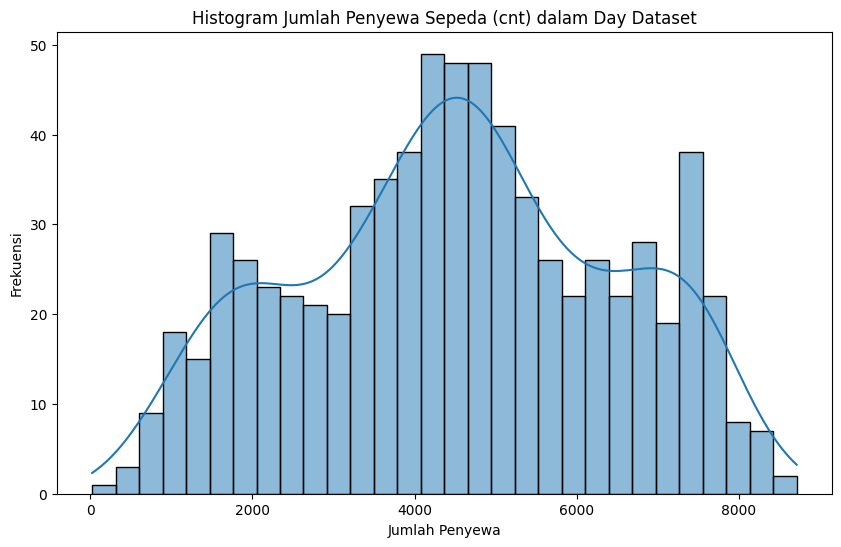

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Histogram Jumlah Penyewa Sepeda (cnt) dalam Day Dataset')
plt.xlabel('Jumlah Penyewa')
plt.ylabel('Frekuensi')
plt.show()

### Pertanyaan 1: Bagaimana hubungan antara suhu dan jumlah penyewa sepeda ?

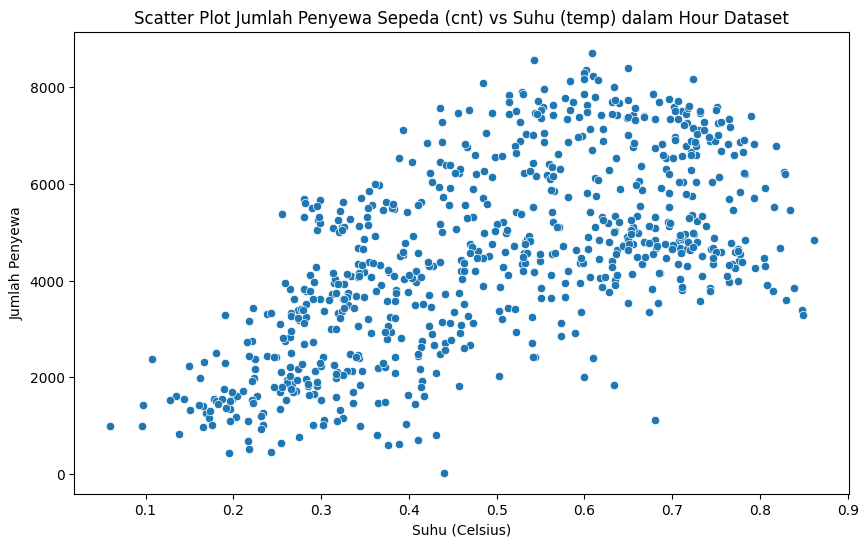

In [29]:
# Scatter plot jumlah penyewa sepeda (cnt) vs suhu (temp)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day)
plt.title('Scatter Plot Jumlah Penyewa Sepeda (cnt) vs Suhu (temp) dalam Hour Dataset')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewa')
plt.show()

Dengan scatter plot ini, Anda dapat melihat pola hubungan antara suhu dan jumlah penyewa sepeda dalam dataset df_day.

### Pertanyaan 2: Apakah terdapat perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

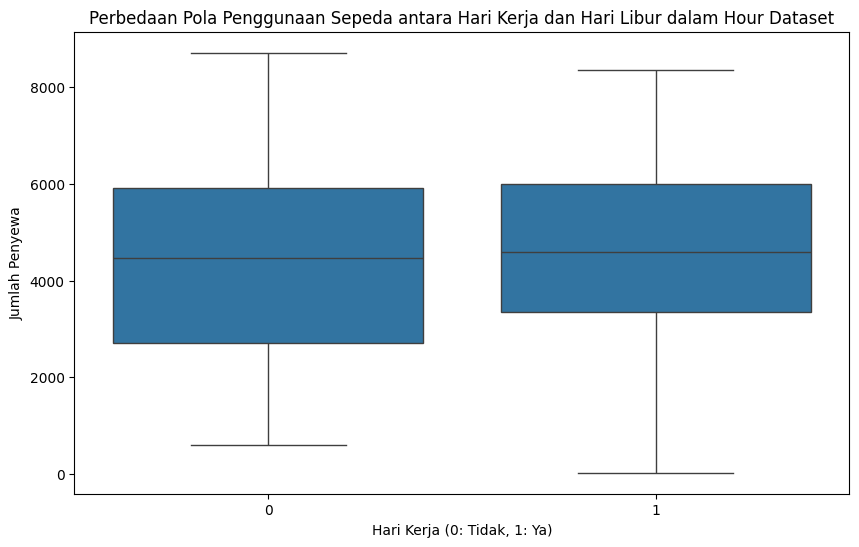

In [30]:
# Box plot jumlah penyewa sepeda (cnt) berdasarkan hari kerja dan hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title('Perbedaan Pola Penggunaan Sepeda antara Hari Kerja dan Hari Libur dalam Hour Dataset')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewa')
plt.show()

Dengan box plot ini, Anda dapat melihat distribusi dan perbedaan pola penggunaan sepeda antara hari kerja dan hari libur dalam dataset df_day.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda dari tahun ke tahun?

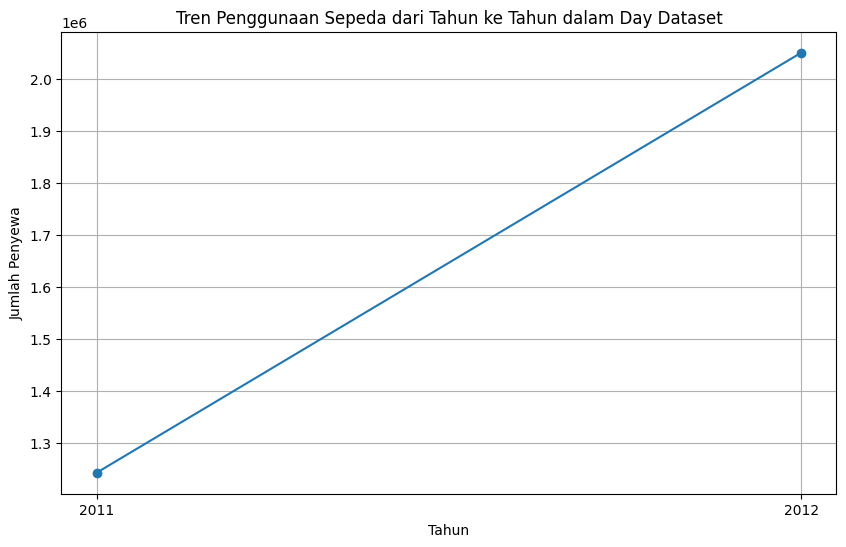

In [31]:
# Mengubah format kolom "dteday" menjadi format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Menambahkan kolom baru "year" untuk menampilkan tahun
df_day['year'] = df_day['dteday'].dt.year

# Menghitung jumlah penyewa sepeda (cnt) per tahun
yearly_cnt = df_day.groupby('year')['cnt'].sum()

# Line plot tren penggunaan sepeda dari tahun ke tahun
plt.figure(figsize=(10, 6))
yearly_cnt.plot(marker='o')
plt.title('Tren Penggunaan Sepeda dari Tahun ke Tahun dalam Day Dataset')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewa')
plt.xticks(yearly_cnt.index)
plt.grid(True)
plt.show()

Line plot ini menunjukkan bagaimana jumlah total penyewa sepeda (cnt) berubah dari tahun ke tahun selama rentang waktu yang tercakup dalam dataset.

### Pertanyaan 4: Bagaimana pola penggunaan sepeda berbeda antara hari-hari dengan kondisi cuaca yang berbeda?

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


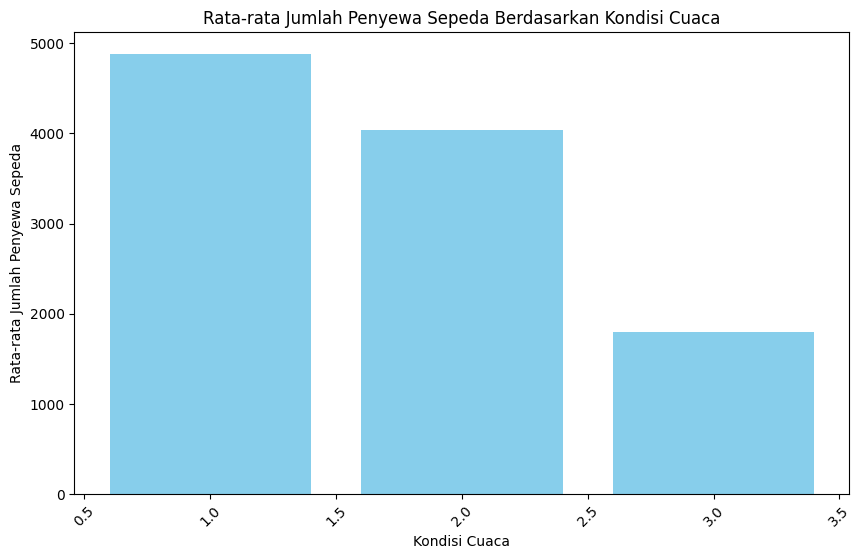

In [32]:
# Mengelompokkan data berdasarkan kondisi cuaca (weathersit)
weather_group = df_day.groupby('weathersit')

# Menghitung rata-rata jumlah penyewa sepeda (cnt) untuk setiap kondisi cuaca
average_cnt_by_weather = weather_group['cnt'].mean()

# Menampilkan hasil
print(average_cnt_by_weather)

# Data rata-rata jumlah penyewa sepeda berdasarkan kondisi cuaca
weather_conditions = average_cnt_by_weather.index
average_counts = average_cnt_by_weather.values

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(weather_conditions, average_counts, color='skyblue')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.title('Rata-rata Jumlah Penyewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(rotation=45)  # Rotasi label agar tidak bertabrakan
plt.show()

Pertanyaan ini bertujuan untuk memahami bagaimana pola penggunaan sepeda berbeda antara kondisi cuaca yang berbeda. Dengan mengelompokkan data berdasarkan kondisi cuaca (weathersit) dan menghitung rata-rata jumlah penyewa sepeda (cnt) untuk setiap kondisi cuaca, kita dapat mengetahui apakah terdapat perbedaan yang signifikan dalam penggunaan sepeda tergantung pada kondisi cuaca

## Conclusion

- Conclution pertanyaan 1:
 Dari analisis data, terlihat bahwa jumlah penyewa sepeda (cnt) cenderung meningkat saat suhu (temp) naik.

- Conclution pertanyaan 2:
Box plot untuk hari kerja (0) menunjukkan median jumlah pengguna sepeda yang lebih tinggi dibandingkan dengan hari libur (1).Kedua box memiliki rentang interkuartil yang serupa tetapi median dan rentang keseluruhan yang berbeda.Dari box plot ini, kita bisa melihat bahwa penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur, tetapi rentang penggunaannya lebih luas pada hari libur.

- Conclution pertanyaan 3:
Dari analisis tren penggunaan sepeda dari tahun ke tahun apat disimpulkan bahwa terjadi peningkatan yang signifikan dalam penggunaan sepeda dari tahun 2011 hingga 2012. Hal ini terlihat dari line plot yang menunjukkan bahwa jumlah penyewa sepeda (cnt) mengalami peningkatan yang konsisten dari tahun 2011 hingga 2012.

- Conclution pertanyaan 4:
Dengan demikian, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap pola penggunaan sepeda

